<a href="https://colab.research.google.com/github/vskokov/py525/blob/main/In_class_1d_Ising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1D Ising model 


The energy of the Ising model for a given configurations of spins is given by 
\begin{align}
{\cal H} = - J \sum_{\langle i,j \rangle} S_i S_j - h \sum_i S_i \,.  
\end{align}
Here $\langle i,j \rangle$ denotes the summation over all nearest-neighbor pairs  (in 1d, it is simply 
$
\sum_{\langle i,j \rangle} S_i S_j = \sum_i S_i S_{i+1}
$)
and $h$ is the external field. We consider a ferromagnet with $J>0$. We  measure $T$ and $h$ in the units of $J$. In other words, we set $J=1$.  

In the thermodynamic equilibrium, given a particular spin configuration ${\cal C}$, the probability of finding the system 
in this configuration is given by the Boltzmann distribution 
\begin{align}
    p({\cal C})  = \frac1{Z} \exp \left [  - \frac{{\cal H} ({\cal C})} { T }\right]\,.
\end{align}


The problem is to evaluate the average energy, magnetization, and the specific heat **per spin** as defined below: 
\begin{align}
  \epsilon = \frac{1}{N} \langle E \rangle  = \frac{1}{N} \sum_{\cal C} {\cal H} ({\cal C}) p({\cal C})  \,, 
\end{align} 
\begin{align}
   m = \frac{1}{N} \langle M \rangle  = \frac{1}{N} \sum_{\cal C} {\cal M} ({\cal C}) p({\cal C})   \,,
\end{align}
\begin{align}
   c_v = \frac{1}{N T^2}  \left( \langle E^2 \rangle - \langle E \rangle^2 \right)  \,.
\end{align}

For instance, the estimate of the
energy expectation value is given by
\begin{align}
    \langle E\rangle = \frac{1}{M} \sum_{i=1}^M {\cal H}({\cal C}_i) \pm \sqrt{\frac{{\rm var} (E)} {M} },   
\end{align}
where ${\cal C}_i$, $i=1, \ldots, M$ are $M$ configurations drawn from the pdf -- the Boltzmann distribution. Hence, we have to  find configurations  which follow the
Boltzmann distribution. The inverse transformation method cannot be applied since ${\cal H} ({\cal C}_i)$ is not invertable. Furthermore, the rejection method is useless since we would need the partition function $Z$ to make it work. However,
calculating the partition function is a task as difficult as calculating the internal
energy without any approximations. Therefore, the method of choice will
be the Metropolis algorithm. 

##Algorithmic steps: 

1. Choose an initial configuration. 
2. Randomly choose a lattice site. Suppose we work with the $i$-th spin and our current configuration is $C_k$ ($k$ configurations have been
accepted so far).  Generate a new configuration $C'$ from $C_k$ by replacing in $C_k$ the entry $S_{i}$ by $-S_{i}$. 
3. The new configuration is accepted with probability
    \begin{align}
        P(A| {\cal C}',{\cal C}_k) =  { min} \left( \exp \left[  - \frac {\Delta E_{i} }{T} \right], 1 \right).  
    \end{align}
Here 
\begin{align}
    \Delta E_{i}  = 2 J S_{i}  (S_{i-1} + S_{i+1}) + 2 h S_{i}
\end{align}
with $S_{i}$ being the *original* spin orientation. 
${\cal C}'$ is accepted if $P(A| {\cal C}', {\cal C})$ is equal to 1 
or if $P(A| {\cal C}',{\cal C}_k)\ge r \in [0,1]$. Otherwise ${\cal C}'$ is rejected. If ${\cal C}'$ is accepted we set ${\cal C}_{k+1} = {\cal C}'$. 
4. Go to the next lattice site, i.e. step 2.  

##How to choose the initial configuration: 

 A particularly useful method is to start the algorithm with at least two different configurations. As soon as equilibrium has been reached, the observables should approach the same saturation values after a certain (finite) number of measurements. Typical choices are the *cold* start and the *hot* start. Cold start means that the temperature is initially below the critical temperature, i.e. in the Ising model all spins are aligned (ferromagnetic state). Hot start means that the temperature is well above the critical temperature and for the Ising model the spin orientation is chosen at random for any site (paramagnetic state).

## Measurements

As soon as thermalization was achieved the procedure to measure interesting
observables can be started. Such a procedure consists of collecting the data required
and in calculating expectation values.  There is one crucial point one should be aware of:
that subsequent configurations ${\cal C}_k$ may be strongly correlated. This problem can be
circumvented by simply neglecting intermediate configurations. For instance, one
may allow a couple or more of 'empty' sweeps between two measurements. This can be optimized by analyzing the auto-correlation time. 
   

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random 
from numba import jit # we will have to use numba to increase computing speed 

N = 100 #Number of spins 

@jit(nopython=True)
def pbc(i):
  """ 
  Periodic boundary conditions:
  """ 
  return i % N 

@jit(nopython=True)
def sign(x):
  """ 
  Sign function:
  """ 
  if (x<0):
     return -1 
  return  1 

@jit(nopython=True)
def magnetization(S):  # Here S is array of spins, e.g. S=[1,-1,1,1,1,-1];
  """ 
  Total magnetization 
  """
  return np.sum(S) 

@jit(nopython=True)
def energy_density(S,h):
  """ 
  Energy density per spin 
  """ 
  nearneigh = [S[i]*S[i+1] for i in range(N-1)] # - J * sum_{<ij>} S_i S_j 
  nearneigh = nearneigh + [S[N-1]*S[0]]
  nearneigh_arr = np.array(nearneigh)
  mag_int = -h*magnetization(S)
  return (-np.sum(nearneigh)+mag_int)/N

@jit(nopython=True)
def deltaE (S, i, h): # \Delta E_i =  ... 
  # Your code here; make sure to modify return statement below 
  return 0 

@jit(nopython=True)
def mc_step(S, T, h):
  """ 
  Performes one MC step; returns True if the trial configuration is accepted 
  T is the temperature
  h is the magnetic field
  J=1
  """ 
  site = random.randint(0, N-1) # we will pick the spin randomly 
  dE = deltaE (S, site, h) 
  acc_prob  =  1 # REPLACE WITH YOUR CODE HERE !!!!!!!!!!!!!!!!!!
  r = random.uniform(0,1)
  if (acc_prob>=r):
    S[site] = - S[site]
    return True
  return False 

@jit(nopython=True)
def sweep(S, T, h):
  """ One sweep through the lattice -- usually N attempts to flip spins; here I use 2 N because I choose spins randomly """  
  for i in range(2*N):
    mc_step(S, T, h)

@jit(nopython=True)
def skip(S, T, h, N=5):
  """ 
  skip a few (5 by defualt) sweeps for to remove correlations  
  """
  for i in range(N):
    sweep(S, T, h)

**Problems:**
See below for problem 3!

1. Numerically compute the energy density, the specific heat (per spin)  as a function of temperature ($T \in [10^{-2},3]$) for zero magnetic field. Use the cold and hot starts. Show that the system achieves thermalization. Use bootstrap to estimate statistical error.  Compare with the analytical solution (see below). 
To plot actual error bars modify the following example 
```
x, y, yerr = np.random.rand(3, 10)
plt.errorbar(x, y, yerr, fmt='o')
```

2. Compute the magnetization density for a fixed value of temperature $T=1$ as a function of the magnetic field $h \in [-3,3]$. Use the cold and hot starts. Show that the system achieves thermalization. Use bootstrap to estimate statistical error.     

In [ ]:
#your code

# Analytical solution (reminder)

The partition function is given by 
\begin{equation}
Z  =  \lambda_1^N + \lambda_2^N\,.
\end{equation}
where the eigen values of the transfer matrix are 
\begin{equation}
    \lambda_{1,2}  = \exp \left( \frac{J}{T} \right) \cosh \left( \frac{h}{T} \right) 
    \pm 
    \sqrt{ \exp \left( \frac{2J}{T} \right) \sinh^2 \left( \frac{h}{T} \right) + \exp \left(  - \frac{2J}{T} \right) }\,.
\end{equation}
At large $N$ it is sufficient to consider the largest eigenvalue, i.e. 
\begin{equation}
Z  \approx  \lambda_1^N \,.
\end{equation}
The **energy density** (the energy per spin) 
\begin{align}
    \epsilon = \frac{T^2}{N}  \frac{\partial } {\partial T} \ln Z \approx   
    \frac{T^2}{N}  \frac{\partial } {\partial T} \ln \lambda_1^N
     = T^2  \frac{\partial } {\partial T} \ln \lambda_1\,,
\end{align}
At zero magnetic field ($h=0$) one  obtains
\begin{align}
    \epsilon (h=0) =  - \tanh \frac{1}{T} \,.
\end{align}
The **specific heat** per spin at zero magnetic field can be found using $c_v = \partial \epsilon/ \partial h$:
\begin{align}
    c_v (h=0) =   \frac{\text{sech}^2\left(\frac{1}{T}\right)}{T^2} \,.
\end{align}

For the **magnetization** density we have 
\begin{align}
m \equiv \frac{M}{N} =\frac{ T  \frac{\partial } {\partial h} \ln Z  }{N} = 
\frac{e^{2/T} \sinh \left(\frac{h}{T}\right)}{\sqrt{e^{4/T} \sinh
   ^2\left(\frac{h}{T}\right)+1}}\,. 
\end{align}


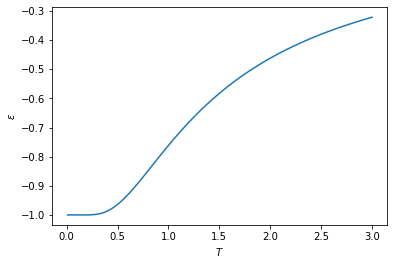

In [ ]:
#For your convenience 
T_array = np.linspace(1e-2,3,100)
epsilon_array = -np.tanh(1/T_array)
plt.plot(T_array,epsilon_array)
plt.xlabel(r'$T$');
plt.ylabel(r'$\epsilon$');

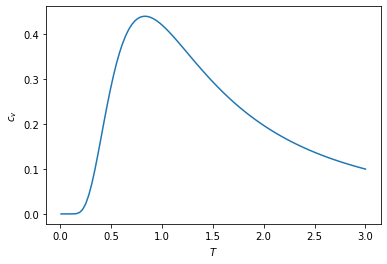

In [ ]:
#For your convenience 
T_array = np.linspace(1e-2,3,100)
cv_array = 1/pow(T_array*np.cosh(1/T_array),2)
plt.plot(T_array, cv_array)
plt.xlabel(r'$T$');
plt.ylabel(r'$c_v$');

# Correlation length

The most fundamental concept underlying the theory of critical phenomena is that of a correlation
length, which is a measure of a typical length-scale of a system. The correlation length can be
defined in terms of the correlation function, which in the case of the Ising model is given by
\begin{align}
    C_s(r) = C_s(i-j) =  \langle S_i S_j  \rangle - \langle S_i \rangle^2\,. 
\end{align}
The correlation function decays exponentially at long distances, and is given by the so-called
Ornstein-Zernicke form
\begin{align}
    C_s(r) \propto \frac{e^{-r/\xi}}{r^{d-2}},  
\end{align}
where $\xi$ is the correlation length. 

**Problems:** 

3.1. Numerically compute the correlation function for $T=0.5,1,2,3$ and zero magnetic field $h=0$. Use the cold and hot starts. Use bootstrap to estimate statistical errors. Use logarithmic scale for the vertical axis:
```
plt.yscale('log')
```
The best way to proceed is to compute the average over the spin-chain: 
\begin{align}
    C_s(r) = \frac{1}{N} \sum_{i}  \left( \langle S_i S_{i+r}  \rangle -  \langle S_i \rangle^2 \right)\,. 
\end{align}

3.2. Extract the correlation length for   $T=0.5,1,2,3$ and zero magnetic field $h=0$. 


In [ ]:
#your code